<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/Fuzzy_logic_based_clinical_decision_support_system_for_the_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [58]:
glycaemia = ctrl.Antecedent(np.arange(60,126,1) , 'Glycaemia')
sirolimus = ctrl.Antecedent(np.arange(0,20,1) , 'Sirolimus')
proteinuria = ctrl.Consequent(np.arange(0,3200,10), 'Proteinuria') 

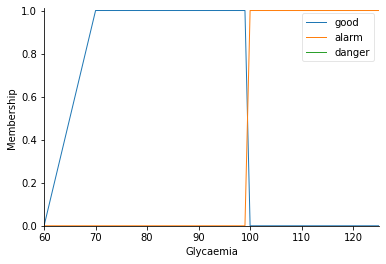

In [59]:
glycaemia['good'] = fuzzy.trapmf(glycaemia.universe,[60,70,99,100])
glycaemia['alarm'] = fuzzy.trapmf(glycaemia.universe,[99,100,130,130])
glycaemia['danger'] = fuzzy.trapmf(glycaemia.universe,[125,126,128,128])
glycaemia.view()

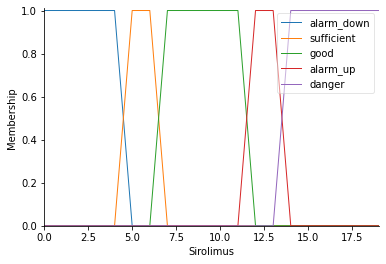

In [60]:
sirolimus['alarm_down'] = fuzzy.trapmf(sirolimus.universe,[0,0,4,5])
sirolimus['sufficient'] = fuzzy.trapmf(sirolimus.universe,[4,5,6,7])
sirolimus['good'] = fuzzy.trapmf(sirolimus.universe,[6,7,11,12])
sirolimus['alarm_up'] = fuzzy.trapmf(sirolimus.universe,[11,12,13,14])
sirolimus['danger'] = fuzzy.trapmf(sirolimus.universe,[13,14,19,20])
sirolimus.view()

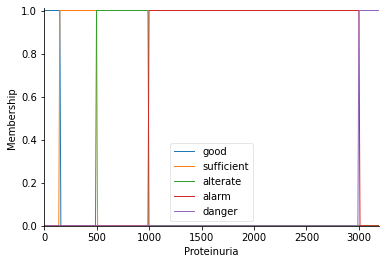

In [61]:
proteinuria['good'] = fuzzy.trapmf(proteinuria.universe,[0,0,150,151])
proteinuria['sufficient'] = fuzzy.trapmf(proteinuria.universe,[149,150,500,501])
proteinuria['alterate'] = fuzzy.trapmf(proteinuria.universe,[499,500,999,1000])
proteinuria['alarm'] = fuzzy.trapmf(proteinuria.universe,[999,1000,3000,3001])
proteinuria['danger'] = fuzzy.trapmf(proteinuria.universe,[2999,3000,3200,3200])
proteinuria.view()

In [63]:
rule1 = ctrl.Rule(glycaemia['good']&sirolimus['good'], proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger']&sirolimus['danger'], proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good']&sirolimus['sufficient'], proteinuria['sufficient'])
rule4 = ctrl.Rule(glycaemia['alarm']&sirolimus['alarm_up'], proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm']&sirolimus['sufficient'], proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good']&sirolimus['alarm_up'], proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm']&sirolimus['good'], proteinuria['sufficient'])
rule8 = ctrl.Rule(glycaemia['good']&sirolimus['alarm_down'], proteinuria['sufficient'])

clinical_decision_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
clinical_decision = ctrl.ControlSystemSimulation(clinical_decision_ctrl)


1999.9999999999998


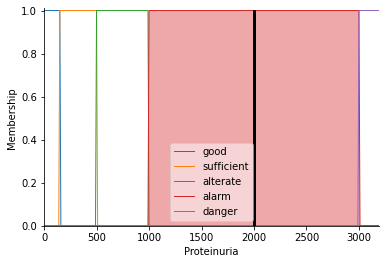

In [65]:
clinical_decision.input['Glycaemia'] = 100
clinical_decision.input['Sirolimus'] = 12

clinical_decision.compute()
print(clinical_decision.output['Proteinuria'])
proteinuria.view(sim = clinical_decision)